In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv(r"C:\Users\sai roshan\Downloads\customer_support_tickets.csv")

In [3]:
print(data.head())

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
print(data.describe())

         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


In [6]:
print(data.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


# Analyze customer support ticket trends 
# Identify common issues

In [7]:
common_issues = data['Ticket Subject'].value_counts().head(10)
print('Top 10 Common Isssues:')
print(common_issues)

Top 10 Common Isssues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


# Plotting ticket trends over time 

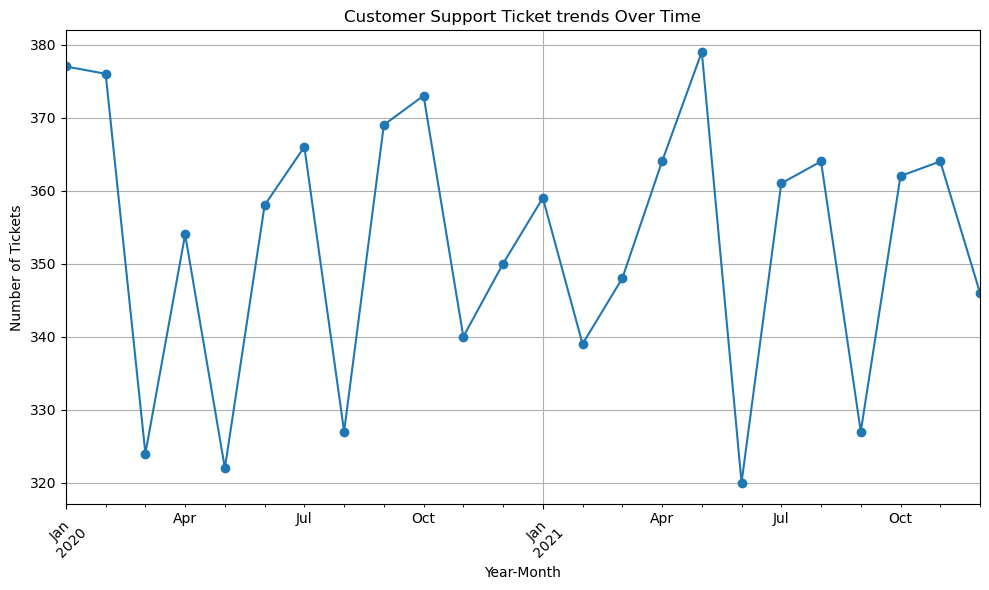

In [8]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M') 
ticket_trends = data.groupby('YearMonth').size()
plt.figure(figsize=(10,6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Segment Customers 
# Segment based on ticket types

In [9]:
satisfaction_segmentation = data.groupby('Customer Satisfaction Rating').size()
print("\nSegmentation based on Customer Satification Levels:")
print(satisfaction_segmentation)


Segmentation based on Customer Satification Levels:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64


# set up the plotting aesthetics

In [10]:
sns.set(style="whitegrid")

# Customer satisfaction Distribution

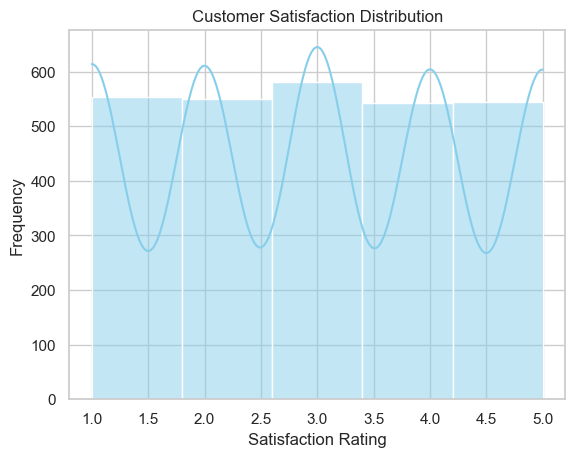

In [11]:
plt.figure(figure=(10,6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True,color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

# Ticket Status Distribution

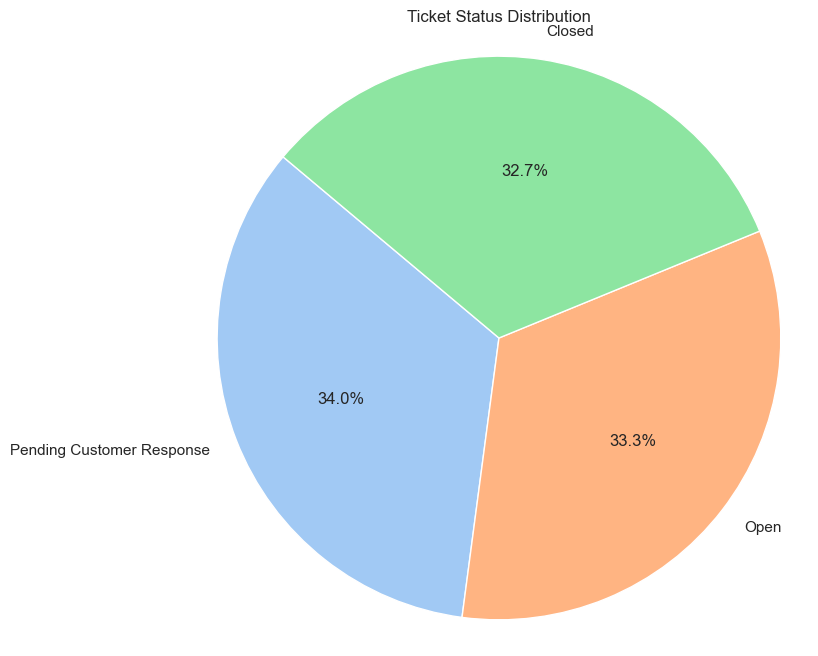

In [12]:
ticket_status_distribution = data['Ticket Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ticket_status_distribution,labels=ticket_status_distribution.index, autopct='%1.1f%%',colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')

plt.show()

# Customer Age Distribution

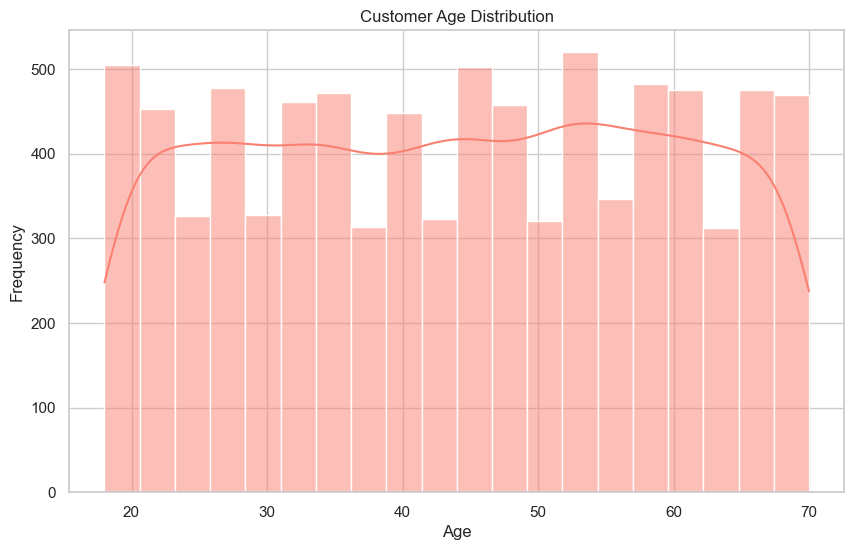

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data['Customer Age'], bins=20, kde=True, color='Salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Customer Gender Distribution

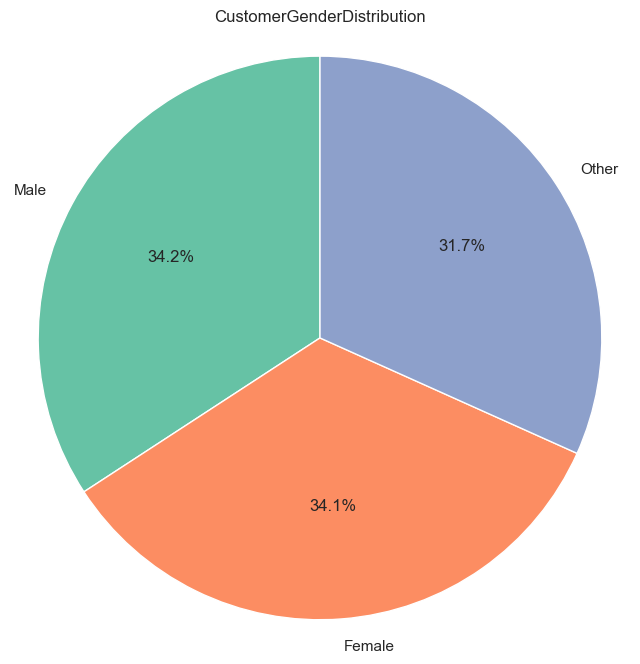

In [14]:
customer_gender_distribution = data['Customer Gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(customer_gender_distribution,labels=customer_gender_distribution.index,autopct='%1.1f%%',colors=sns.color_palette('Set2'),startangle=90)
plt.title('CustomerGenderDistribution')
plt.axis('equal')

plt.show()

# Ticket channel Distribution

C:\Users\sai roshan\AppData\Local\Temp\ipykernel_7276\1750566747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_channel_distribution.index,y=ticket_channel_distribution.values, palette='rocket')


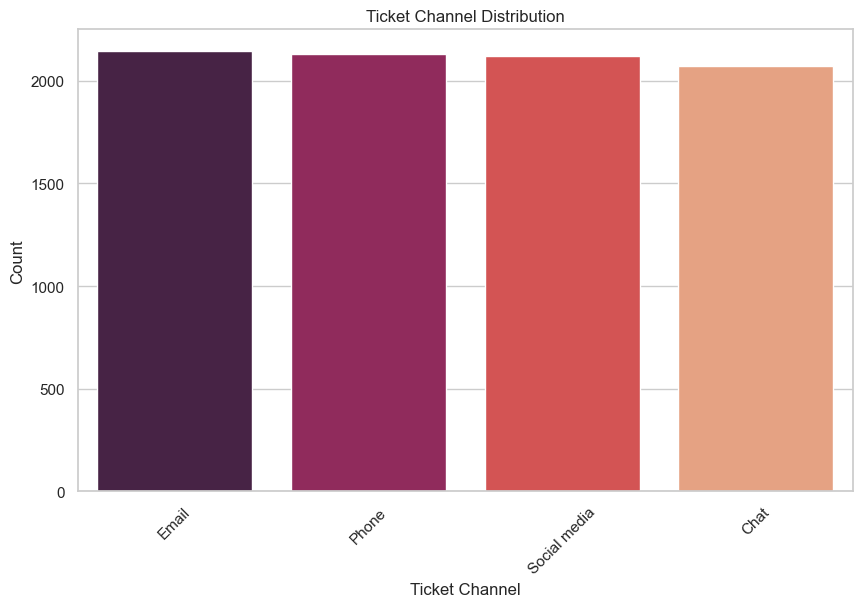

In [15]:
plt.figure(figsize=(10, 6))
ticket_channel_distribution = data['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index,y=ticket_channel_distribution.values, palette='rocket') 
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Average Customer satification by Gender

C:\Users\sai roshan\AppData\Local\Temp\ipykernel_7276\3277728798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted',order=['Male','Female','Other'])


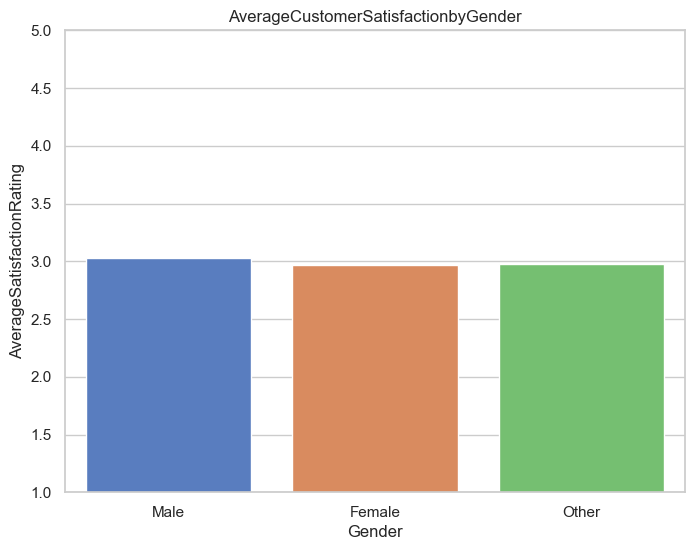

In [16]:
average_satisfaction=data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted',order=['Male','Female','Other'])
plt.title('AverageCustomerSatisfactionbyGender')
plt.xlabel('Gender')
plt.ylabel('AverageSatisfactionRating')
plt.ylim(1,5)

plt.show()

# Average Customer Satifaction by Gender 

C:\Users\sai roshan\AppData\Local\Temp\ipykernel_7276\3277728798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted',order=['Male','Female','Other'])


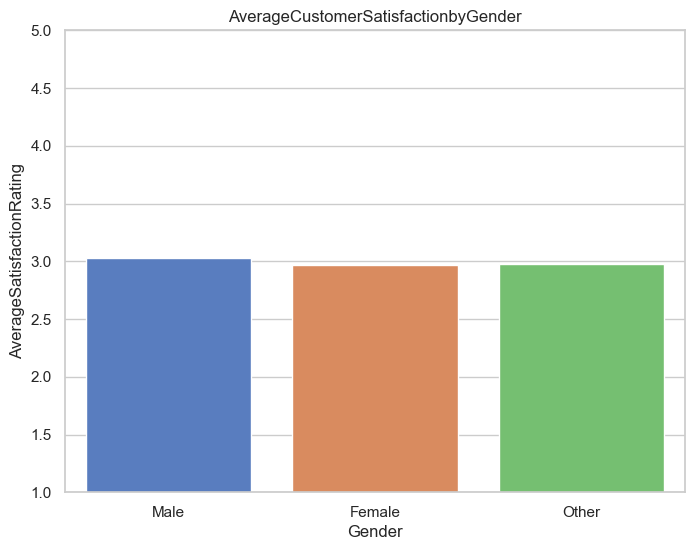

In [17]:
average_satisfaction=data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted',order=['Male','Female','Other'])
plt.title('AverageCustomerSatisfactionbyGender')
plt.xlabel('Gender')
plt.ylabel('AverageSatisfactionRating')
plt.ylim(1,5)

plt.show()

# Product Purchased Distribution

C:\Users\sai roshan\AppData\Local\Temp\ipykernel_7276\3971037107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_purchased_distribution.index,x=product_purchased_distribution, palette='magma')


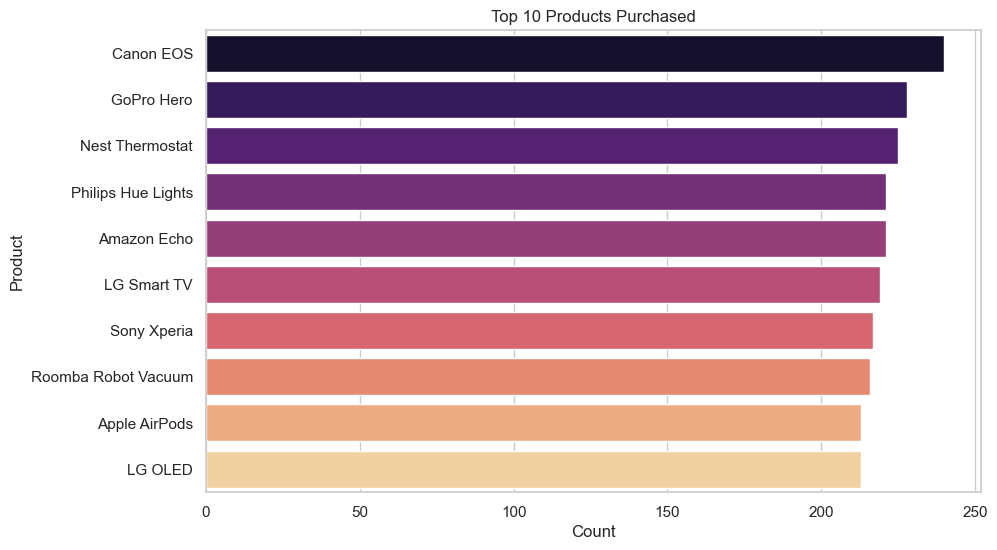

In [18]:
plt.figure(figsize=(10, 6))
product_purchased_distribution = data['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index,x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')

plt.show()

# Top Items Purchased by Male

Text(0, 0.5, 'Product')

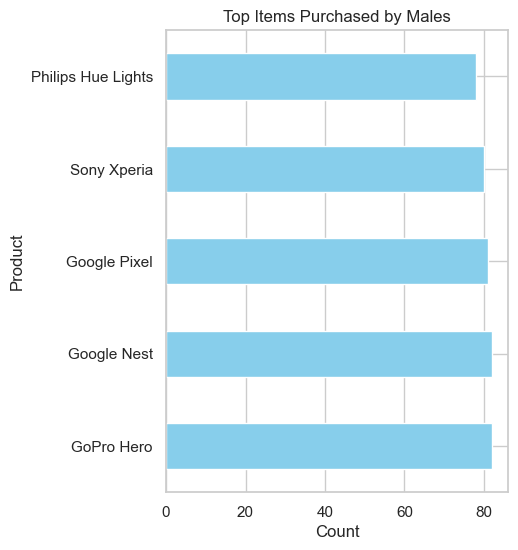

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1, 3 , 1)
top_items_male = data[data['Customer Gender'] =='Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')

plt.ylabel('Product')

# Top Items Purchased by Females

Text(0, 0.5, 'Product')

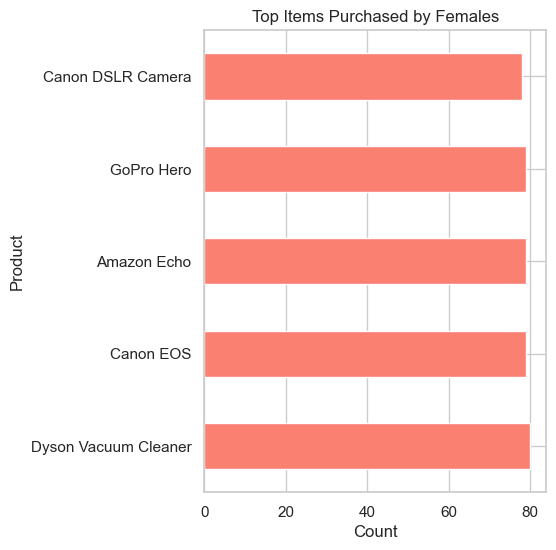

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 2)
top_items_female = data[data['Customer Gender'] =='Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by other Gender

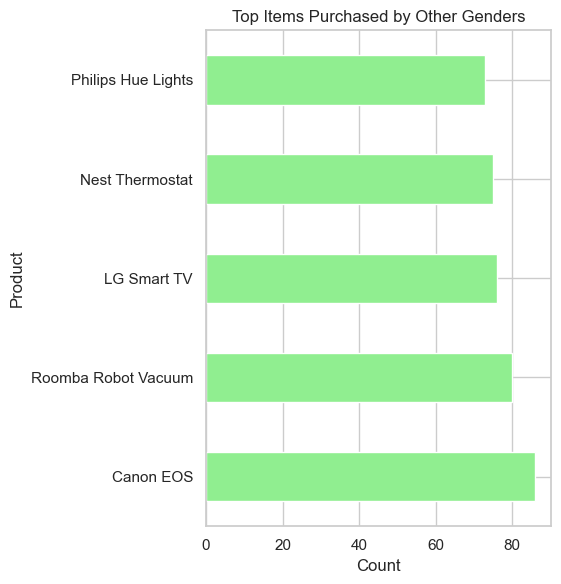

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 3)
top_items_other = data[data['Customer Gender'] =='Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()

plt.show()

# Count ticket types

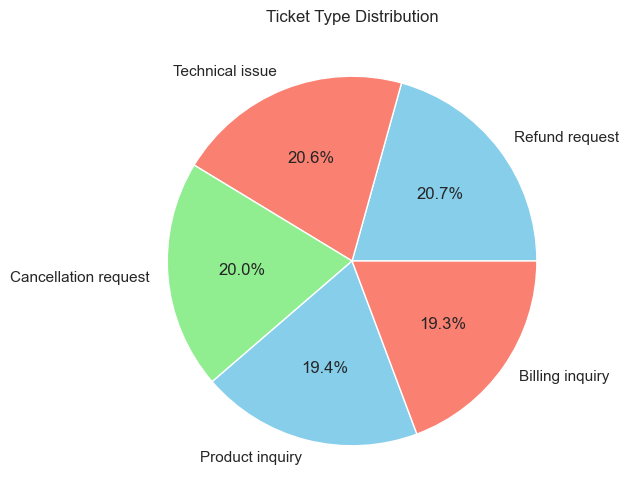

In [22]:
ticket_type_distribution = data['Ticket Type'].value_counts()
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie',autopct='%1.1f%%',colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')

plt.show()

# Count Ticket Priorities

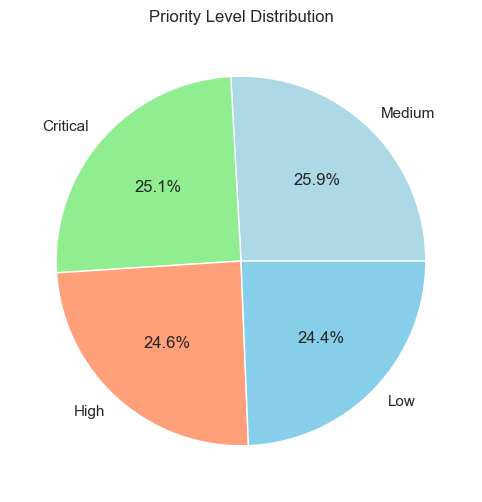

In [23]:
priority_distribution = data['Ticket Priority'].value_counts()
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')

plt.show()

# Define age Gruops

In [24]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', '81-90', '91-100']

# Categorize customers into age groups

In [25]:
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins,labels=labels, right=False)

# Calculate number of tockets raised by each age group

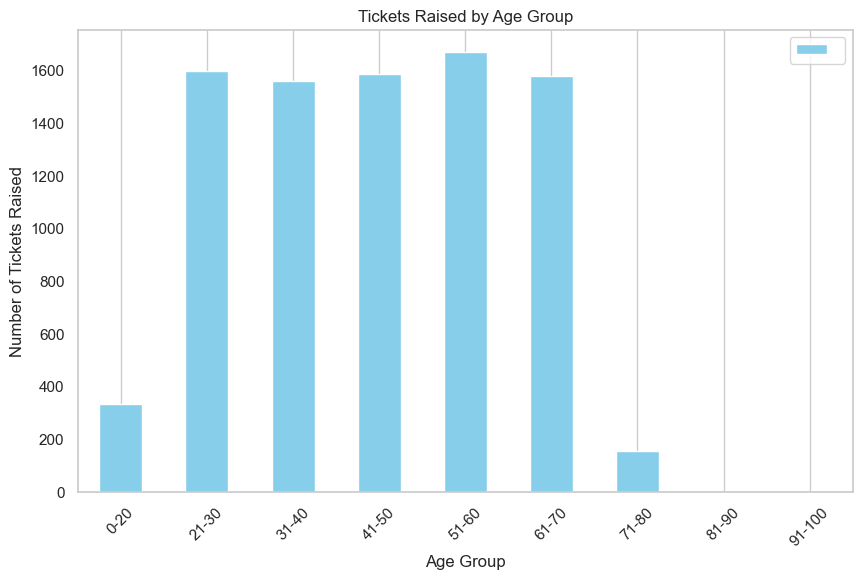

In [26]:
tickets_by_age_group = data.groupby('Age Group', observed=False).size()
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue', legend='False')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

# Replace inf values with NAN

In [27]:
data.replace([np.inf,-np.inf], np.nan, inplace=True)

# Create a Facet Grid for each ticket Type

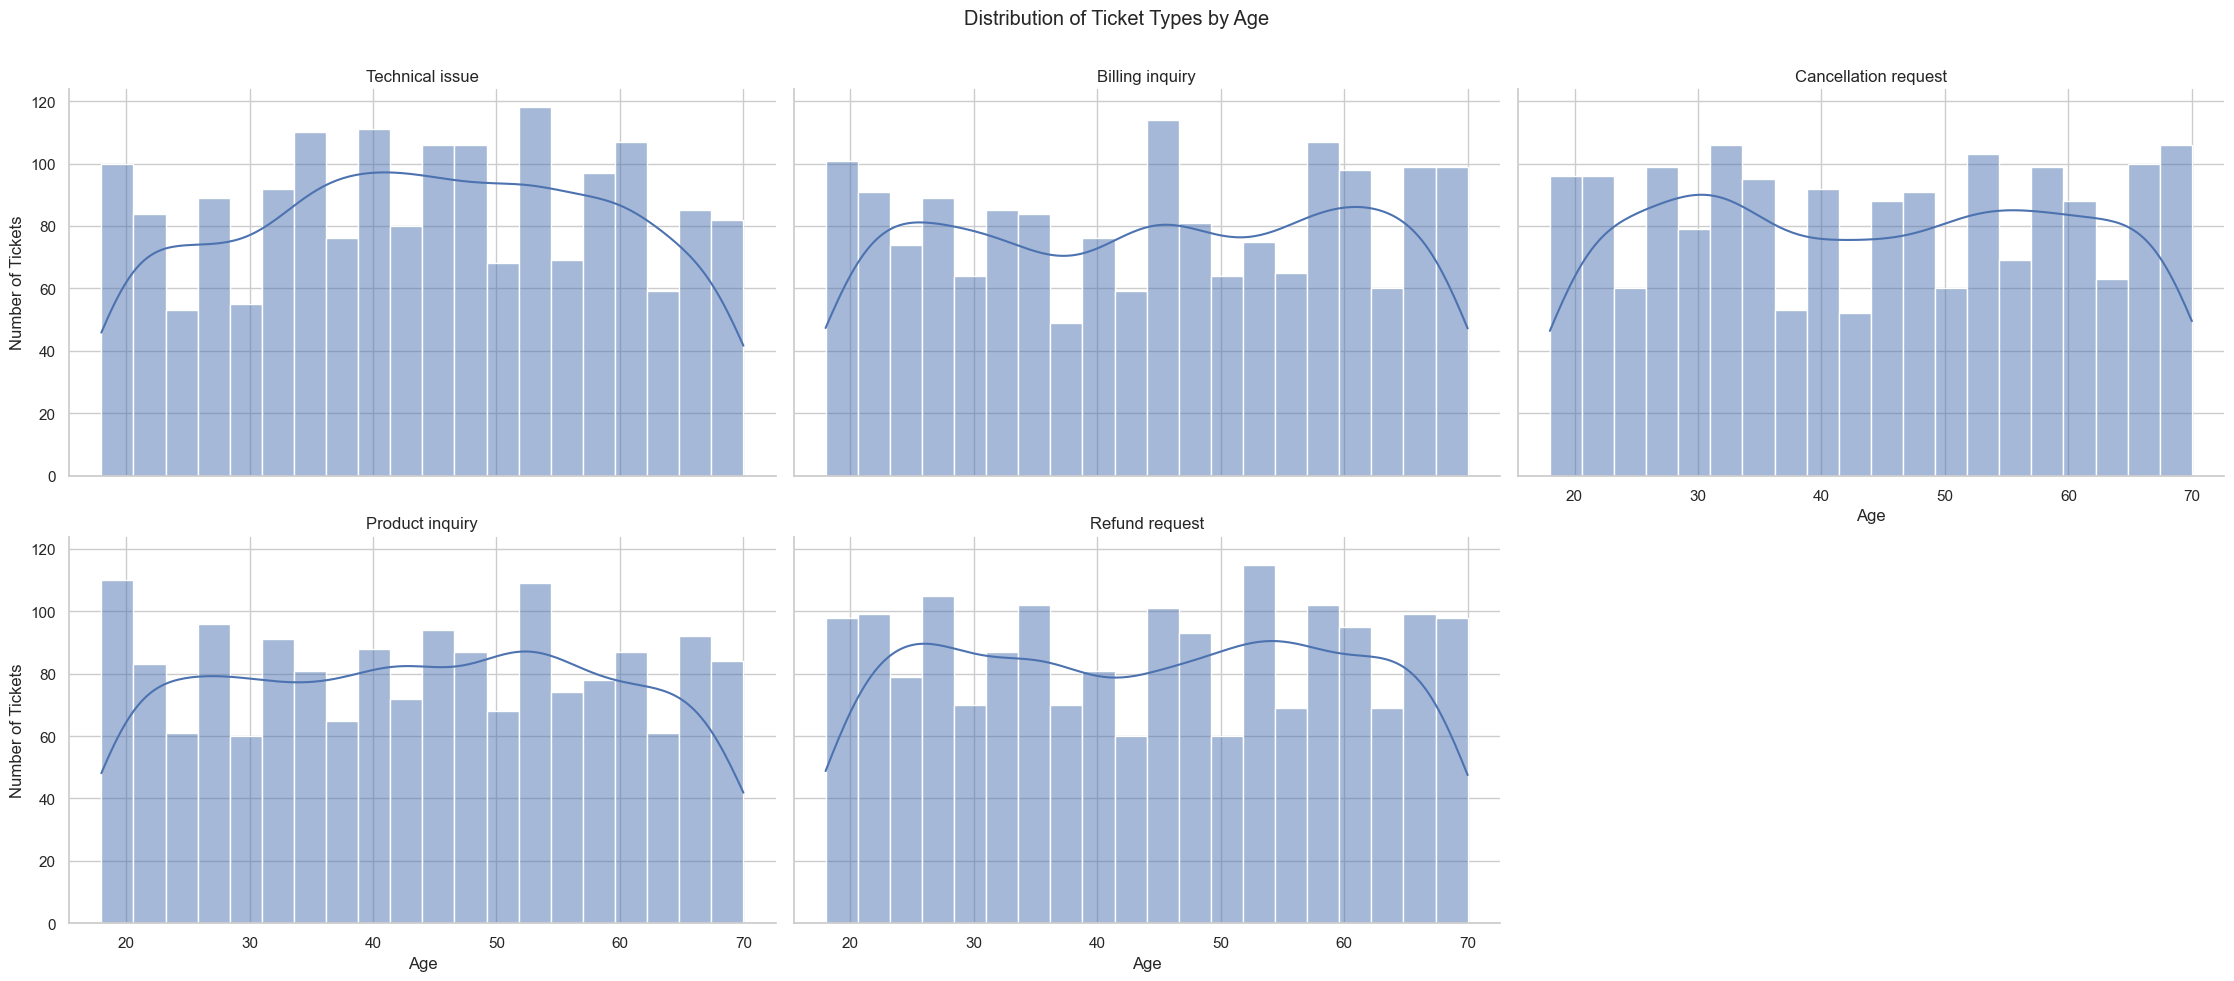

In [28]:
g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3,height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
 
plt.show()